背景:
+ Echarts是百度开源的非常好用强大的库可视化图表库，Pyecharts是他的python库版本

In [1]:
import pandas as pd
import pyecharts as pch
%matplotlib inline
xlsx_path = "./datas/stocks/baidu_stocks.xlsx"
df = pd.read_excel(xlsx_path, index="序号")
df.head()

,datetime,code,open,close,high,low,vol,p_change
0,2019-12-03,BIDU,115.199997,114.800003,116.019997,113.300003,3493249,-2.25
1,2019-12-02,BIDU,118.389999,117.440002,119.764999,116.400002,2203313,-0.92
2,2019-11-29,BIDU,118.300003,118.529999,118.690002,117.599998,1917004,-0.82
3,2019-11-27,BIDU,119.180000,119.510002,119.839996,118.440002,2341070,0.77
4,2019-11-26,BIDU,120.010002,118.599998,120.440002,118.099998,3813176,-1.43


In [2]:
print(df.index)

RangeIndex(start=0, stop=227, step=1)


In [3]:
df.set_index(pd.to_datetime(df["datetime"]),inplace=True)

In [4]:
# 各公司的平均开盘价格
import numpy as np
df_open=df.groupby("code")["open"].agg(np.mean)
df_open.head()

code
BIDU    132.518595
Name: open, dtype: float64

In [5]:
print(df["code"].value_counts())

BIDU    227
Name: code, dtype: int64


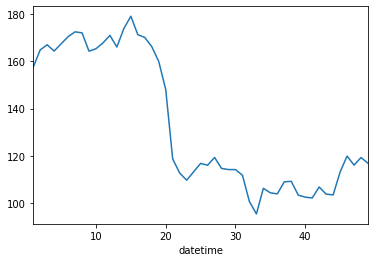

In [8]:
# 每周平均开盘价格的折线图
df_week=df.groupby(df.index.week)["open"].agg(np.mean).plot()

In [7]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [11]:
df.sort_index(inplace=True)

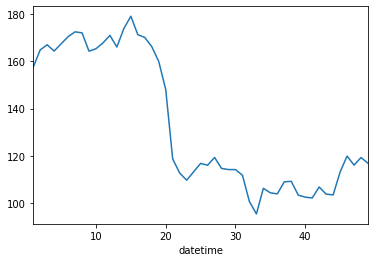

In [12]:
df_week=df.groupby(df.index.week)["open"].agg(np.mean).plot()

In [13]:
from pyecharts.charts import Line
from pyecharts import options as opts

In [21]:
# 创建一个折线图
line=Line() 
# x轴
line.add_xaxis(df.index.to_list()) # 把index当list传给x轴

# 第一个为label,第二个为list
line.add_yaxis("开盘价", df["open"].round(2).to_list()) 
line.add_yaxis("收盘价", df["close"].round(2).to_list())

# 图表配置
line.set_global_opts(
    title_opts=opts.TitleOpts(title="百度股票2019年"),
    tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross")
)

In [22]:
#  render数据
line.render_notebook()